# Non Linear Regression Analysis

     
Non-linear regression is a method to model the non-linear relationship between the independent variables 𝑥
and the dependent variable 𝑦. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of 𝑘 degrees (maximum power of 𝑥). For example:

 𝑦=𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑 

Non-linear functions can have elements like exponentials, logarithms, fractions, and so on.

 If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression since linear regression presumes that the data is linear. Let's learn about non linear regressions and apply an example in python. In this notebook, we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014. For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014: we download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.



## Importing required libraries

In [2]:
import numpy as np
import pandas as pd

## Downloading dataset

In [3]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv


2024-01-31 13:03:23 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


## Reading the data

In [4]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.

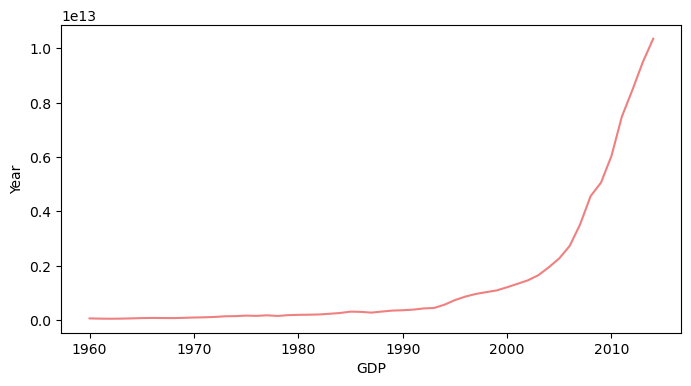

In [10]:
plt.figure(figsize=(8,4))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, "lightcoral")
plt.ylabel("Year")
plt.xlabel("GDP")
plt.show()

## Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

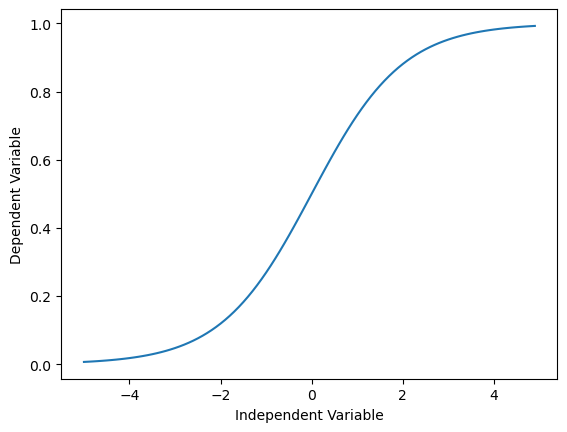

In [11]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

𝑌̂ =11+𝑒−𝛽1(𝑋−𝛽2)

𝛽1 : Controls the curve's steepness,

𝛽2 : Slides the curve on the x-axis.

## Building the Model

Now, let's build our regression model and initialize its parameters. 

In [12]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1* (x- Beta_2)))
    return y

Let's look at a sample sigmoid line thah might fit with the data:


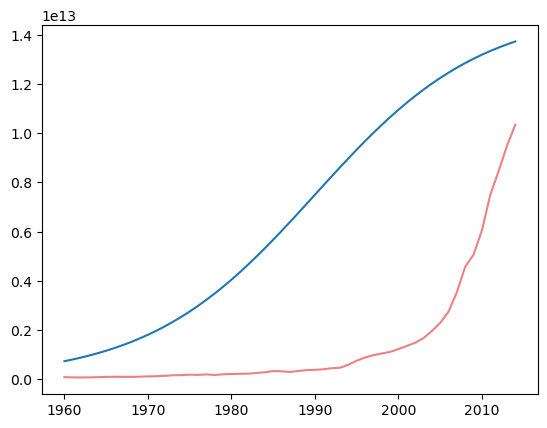

In [13]:
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# Plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, "lightcoral")

Our task here is to find the best kparameters for our model. Let's first normalize our x and y:

In [14]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

To find the best parameters for our fit line we can use *curve_fit* which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

*popt* are our optimized parameters.

In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 beta_1 = 690.451700, beta_2 = 0.997207


Now we plot our resulting regression model.

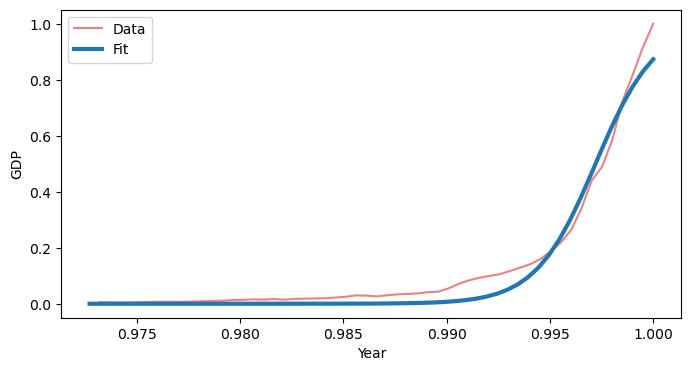

In [17]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,4))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'lightcoral',label="Data")
plt.plot(x, y, linewidth=3.0, label="Fit")
plt.legend(loc= 'best')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

## Accuracy of our model

Let's take a look to the accuracy of our model by using evaluating metrics in regression:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.95
